## Import

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score

## Scenario 1:
以 soccer1.jpg 中的場地 pixel 建構 GMM，稱此模型為 M1，並以 soccer1.jpg 做測試

In [2]:
img = cv.imread('soccer1.jpg')
img.shape

(225, 400, 3)

In [3]:
soccer1 = img.reshape((-1,3))
soccer1.shape

(90000, 3)

### Model building by soccer1.jpg

In [4]:
GMM_model = GMM(n_components=2, covariance_type='tied').fit(soccer1)

### Test by soccer1.jpg

In [5]:
prediction1 = GMM_model.predict(soccer1)
prediction1.shape

(90000,)

### Evaluation
使用 `sklearn.metrics` 的 `silhouette_score()` 方法

> Compute the mean Silhouette Coefficient of all samples.
> The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).
> The best value is 1 and the worst value is -1.

[sklearn.metrics.silhouette_score - scikit-learn 1.0.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)


In [6]:
soccer1_mask = pd.read_csv('soccer1_mask.csv',)
test1 = np.array(soccer1_mask['GT (True/False)'])
test1 = test1.reshape((-1, 1))

In [7]:
print("Scenario 1 GMM silhouette score: ", silhouette_score(test1, prediction1))

Scenario 1 GMM silhouette score:  0.8729107464016644


### Segmentation result

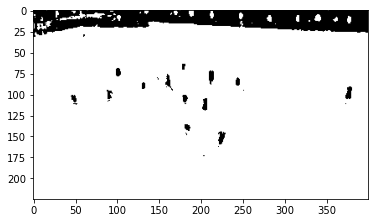

In [13]:
prediction1 = prediction1.reshape(img.shape[0],img.shape[1])
pred1_mask = []
for i in prediction1:
    tmp = []
    for j in i:
        if(j == 0):
            tmp.append([255,255,255])
        else:
            tmp.append([0,0,0])
    pred1_mask.append(tmp)
pred1_mask = np.array(pred1_mask)
cv.imwrite('./result/Segmentation1.jpg', pred1_mask)
plt.imshow(pred1_mask)

## Scenario 2:
以 M1 針對 soccer2.jpg 做測試
### Test by soccer2.jpg

In [9]:
img2 = cv.imread('soccer2.jpg')
soccer2 = img2.reshape((-1,3))
prediction2 = GMM_model.predict(soccer2)

### Evaluation

In [10]:
soccer2_mask = pd.read_csv('soccer2_mask.csv',)
test2 = np.array(soccer2_mask['GT (True/False)'])
test2 = test2.reshape((-1, 1))

In [11]:
print("Scenario 2 GMM silhouette score: ", silhouette_score(test2, prediction2))

Scenario 2 GMM silhouette score:  0.8544204153889856


### Segmentation result

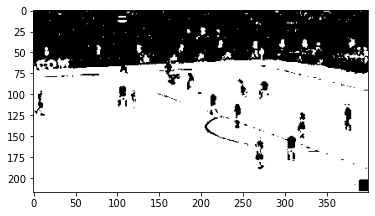

In [14]:
prediction2 = prediction2.reshape(img2.shape[0],img2.shape[1])
pred2_mask = []
for i in prediction2:
    tmp = []
    for j in i:
        if(j == 0):
            tmp.append([255,255,255])
        else:
            tmp.append([0,0,0])
    pred2_mask.append(tmp)
pred2_mask = np.array(pred2_mask)
cv.imwrite('./result/Segmentation2.jpg', pred2_mask)
plt.imshow(pred2_mask)